In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import cartopy.crs as ccrs                   # import projections
import cartopy
import gsw
# import cftime

In [ ]:
str = 


https://oceandata.sci.gsfc.nasa.gov/cgi/getfile/A20191

In [11]:
%matplotlib inline  
#%matplotlib qt5

plt.rcParams['figure.figsize'] = (5,4)
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 400
plt.close('all')

In [12]:
boxsize = 10 
Xo = 90
Yo = 15
xmin, xmax = (Xo - boxsize, Xo + boxsize)
ymin, ymax = (Yo - boxsize, Yo + boxsize)
extent = [xmin, xmax, ymin, ymax]

In [13]:
#file = '../Data/dataset-duacs-nrt(7:10:219).nc'



In [14]:
ds = xr.open_dataset(file)

In [15]:
ds

<xarray.Dataset>
Dimensions:    (time: 1, latitude: 81, longitude: 80)
Coordinates:
  * time       (time) datetime64[ns] 2019-07-10
  * latitude   (latitude) float32 5.125 5.375 5.625 5.875 ... 24.62 24.88 25.12
  * longitude  (longitude) float32 80.12 80.38 80.62 80.88 ... 99.38 99.62 99.88
Data variables:
    ugos       (time, latitude, longitude) float64 ...
    vgos       (time, latitude, longitude) float64 ...
    sla        (time, latitude, longitude) float64 ...
Attributes: (12/45)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    creator_email:                   servicedesk.cmems@mercator-ocean.eu
    ...                              ...
    time_coverage_duration:          P1D
    time_coverage_end:               2021-07-13T12:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             2021-07-12T12:00:00Z
    title:                           NRT merged all satellites Global Ocean G...
    History:                         Translated to CF-1.0 Conventions by Netc...

In [16]:
longitude = ds.longitude
latitude = ds.latitude
ugos = ds.ugos
vgos = ds.vgos

In [17]:
sla = ds.sla

/Users/lfp/opt/anaconda3/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/var/folders/x9/37hmb2cj4j72s26nwv19n_xh0000gn/T/ipykernel_50442/2126127196.py:12: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(cs,fraction = 0.022, extend='both')


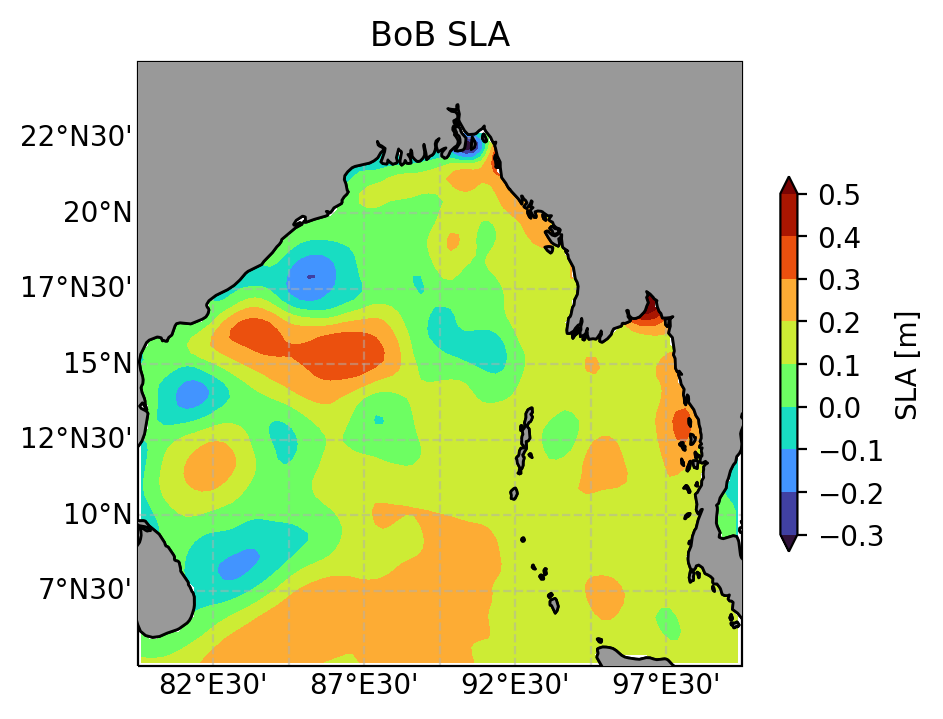

In [18]:
ax = plt.axes(projection = ccrs.PlateCarree(central_longitude=200))  # Orthographic
ax.set_title('BoB SLA')
plt.set_cmap(cmap=plt.get_cmap('nipy_spectral'))
plt.set_cmap(cmap=plt.get_cmap('turbo'))
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.5, linestyle='--')
gl.top_labels = False
gl.ylabels_right = False
levels = 10
cs = ax.contourf(ds.longitude,ds.latitude,np.squeeze(sla), levels, extend='both', transform=ccrs.PlateCarree())
#cs = ax.pcolormesh(ds.longitude,ds.latitude,np.squeeze(ds.sla), vmin=levels[0], vmax=levels[-1], transform=ccrs.PlateCarree())
#cb = plt.colorbar(cs,ax=ax,shrink=.8,pad=.05)
cb = plt.colorbar(cs,fraction = 0.022, extend='both')
cb.set_label('SLA [m]',fontsize = 10)
ax.coastlines()
ax.add_feature(cartopy.feature.LAND, zorder=3, facecolor=[.6,.6,.6], edgecolor='black')

ax.set_extent(extent, crs=ccrs.PlateCarree())

if savefig:

    plt.savefig(__figdir__+'_SLA'+plotfiletype,**savefig_args)
